In [1]:
#nvidia-smi
# pwd used to get current directory 

In [2]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten


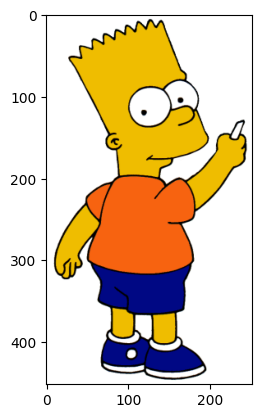

In [3]:
# prompt: plot some images stored in Bart folder

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get the current working directory
cwd = os.getcwd()

# Create a path to the Bart folder
bart_folder_path = r'C:\Users\Saurabh\Desktop\summer work\LS_ML\Bart'

# List all files in the Bart folder
files = os.listdir(bart_folder_path)

# Iterate through the files and plot the images
for file in files:
    # Check if the file is an image
    if file.endswith(".bmp") or file.endswith(".png"):
        # Create a path to the image file
        image_path = os.path.join(bart_folder_path, file)

        # Load the image
        image = mpimg.imread(image_path)

        # Plot the image
        plt.imshow(image)
        #plt.show()



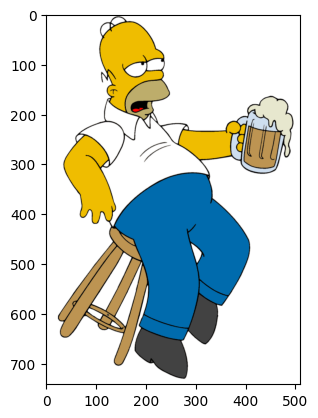

In [4]:
# prompt: plot some images stored in Homer folder

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Get the current working directory
cwd = os.getcwd()

# Create a path to the Bart folder
homer_folder_path = r'C:\Users\Saurabh\Desktop\summer work\LS_ML\Homer'

# List all files in the Bart folder
files = os.listdir(homer_folder_path)

# Iterate through the files and plot the images
for file in files:
    # Check if the file is an image
    if file.endswith(".bmp") or file.endswith(".png"):
        # Create a path to the image file
        image_path = os.path.join(homer_folder_path, file)

        # Load the image
        image = mpimg.imread(image_path)

        # Plot the image
        plt.imshow(image)
        #plt.show()

In [5]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

# Get the current working directory
cwd = os.getcwd()

# Create paths to the Bart and Homer folders
bart_folder_path = r'C:\Users\Saurabh\Desktop\summer work\LS_ML\Bart'
homer_folder_path = r'C:\Users\Saurabh\Desktop\summer work\LS_ML\Homer'

# Initialize empty lists for images and labels
images = []
labels = []

# Function to load images from a folder and resize them
def load_images_from_folder(folder_path, label, target_size=(64, 64)):
    for file in os.listdir(folder_path):
        if file.endswith(".bmp") or file.endswith(".png"):
            image = Image.open(os.path.join(folder_path, file)).convert('L')
            image = image.resize(target_size)
            image_array = np.array(image)
            images.append(image_array)
            labels.append(label)

# Load images from Bart and Homer folders
load_images_from_folder(bart_folder_path, 0)  # Label for Bart images
load_images_from_folder(homer_folder_path, 1)  # Label for Homer images

# Convert images and labels to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Shuffle the data
indices = np.arange(len(images))
np.random.seed(29)
images = images[indices]
labels = labels[indices]

# Split the data into training, validation, and testing sets
split_index1 = int(0.9 * len(images))
split_index2 = int(0.8 * len(images))



x_train,x_val,  x_test = np.split(images, [split_index1,split_index2 ])
y_train ,y_val , y_test = np.split(labels, [split_index1,split_index2 ])

# Print the shapes of the training, validation, and testing sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)




x_train shape: (242, 64, 64)
y_train shape: (242,)
x_test shape: (54, 64, 64)
y_test shape: (54,)


In [6]:
import random
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=60, batch_size=32)


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test )
print(f"Test accuracy: {test_accuracy * 100}%")


C:\Users\Saurabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5896 - loss: 106.3767
Epoch 2/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4593 - loss: 147.6402 
Epoch 3/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4982 - loss: 36.2929 
Epoch 4/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6360 - loss: 6.4162 
Epoch 5/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5427 - loss: 17.0003 
Epoch 6/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6047 - loss: 12.2405 
Epoch 7/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5778 - loss: 13.0778 
Epoch 8/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4964 - loss: 23.2014 
Epoch 9/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6573 - loss: 17.9241
Epoch 10/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7680 - loss: 5.8949 
Epoch 11/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7618 - loss: 4.2585 
Epoch 12/60
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6202 - loss: 1

In [7]:
model.evaluate(x_test, y_test ,)
model.predict(x_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9525 - loss: 0.2439 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9998820e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9991137e-01],
       [1.0000000e+00],
       [2.4042492e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9999988e-01],
       [9.9999988e-01],
       [1.0000000e+00],
       [6.8490505e-01],
       [9.998431

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 811,973 (3.10 MB)

 Trainable params: 270,657 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 541,316 (2.06 MB)